# Bank Marketing Response Predict

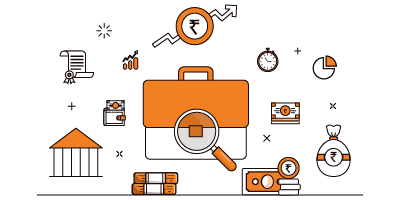

### Import Library 

In [11]:
# data processing
import pandas as pd
# linear algebra
import numpy as np 
# Data visualzation 
import matplotlib.pyplot as plt 
# import 'Seaborn' 
import seaborn as sns
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
# to make the plot attractive
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# missingno is easy-to-use missing data visualizations 
import missingno as msn
# connects the Pandas data frame with Plotly 
import cufflinks as cf
cf.go_offline()

### Loading the data

In [12]:
data=  pd.read_csv("train.csv")

### Data Dictionary

### User Define Functions

In [13]:
def univariate_outlier(x):
    q1 = data[x].describe().T["25%"]
    q3 = data[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in data[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out
    
def feature_box_kde_normality(x):
    normality_test(data[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=data,x=x,ax=ax1)
    sns.kdeplot(data=data,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def feature_analysis(x):
    a = data[x].unique()
    d = data[x].value_counts()
    b = data[x].value_counts(normalize = True)*100
    c = data[x].isna().sum()
    print('unique_values:', '\n', a, '\n', 'value_counts:','\n', d, '\n','proportion of value:', '\n', b, '\n','count of nan values:', c)

### EDA

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,retired,married,secondary,no,166,no,yes,unknown,3,jul,211,1,-1,0,unknown,no
1,51,blue-collar,married,primary,no,2995,yes,no,unknown,11,jun,93,2,-1,0,unknown,no
2,50,management,married,tertiary,no,569,no,yes,cellular,18,aug,452,4,-1,0,unknown,no
3,27,admin.,married,secondary,no,73,yes,no,cellular,5,feb,140,1,-1,0,unknown,no
4,38,self-employed,divorced,tertiary,no,6447,no,no,cellular,12,jan,296,1,-1,0,unknown,no


In [15]:
data.shape

(33908, 17)

In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        33908 non-null  int64 
 1   job        33908 non-null  object
 2   marital    33908 non-null  object
 3   education  33908 non-null  object
 4   default    33908 non-null  object
 5   balance    33908 non-null  int64 
 6   housing    33908 non-null  object
 7   loan       33908 non-null  object
 8   contact    33908 non-null  object
 9   day        33908 non-null  int64 
 10  month      33908 non-null  object
 11  duration   33908 non-null  int64 
 12  campaign   33908 non-null  int64 
 13  pdays      33908 non-null  int64 
 14  previous   33908 non-null  int64 
 15  poutcome   33908 non-null  object
 16  y          33908 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.4+ MB


In [18]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking for the Missing values 

In [19]:
data.isnull().sum()/data.shape[0]*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

##### Graphically representation of missing values

<AxesSubplot:>

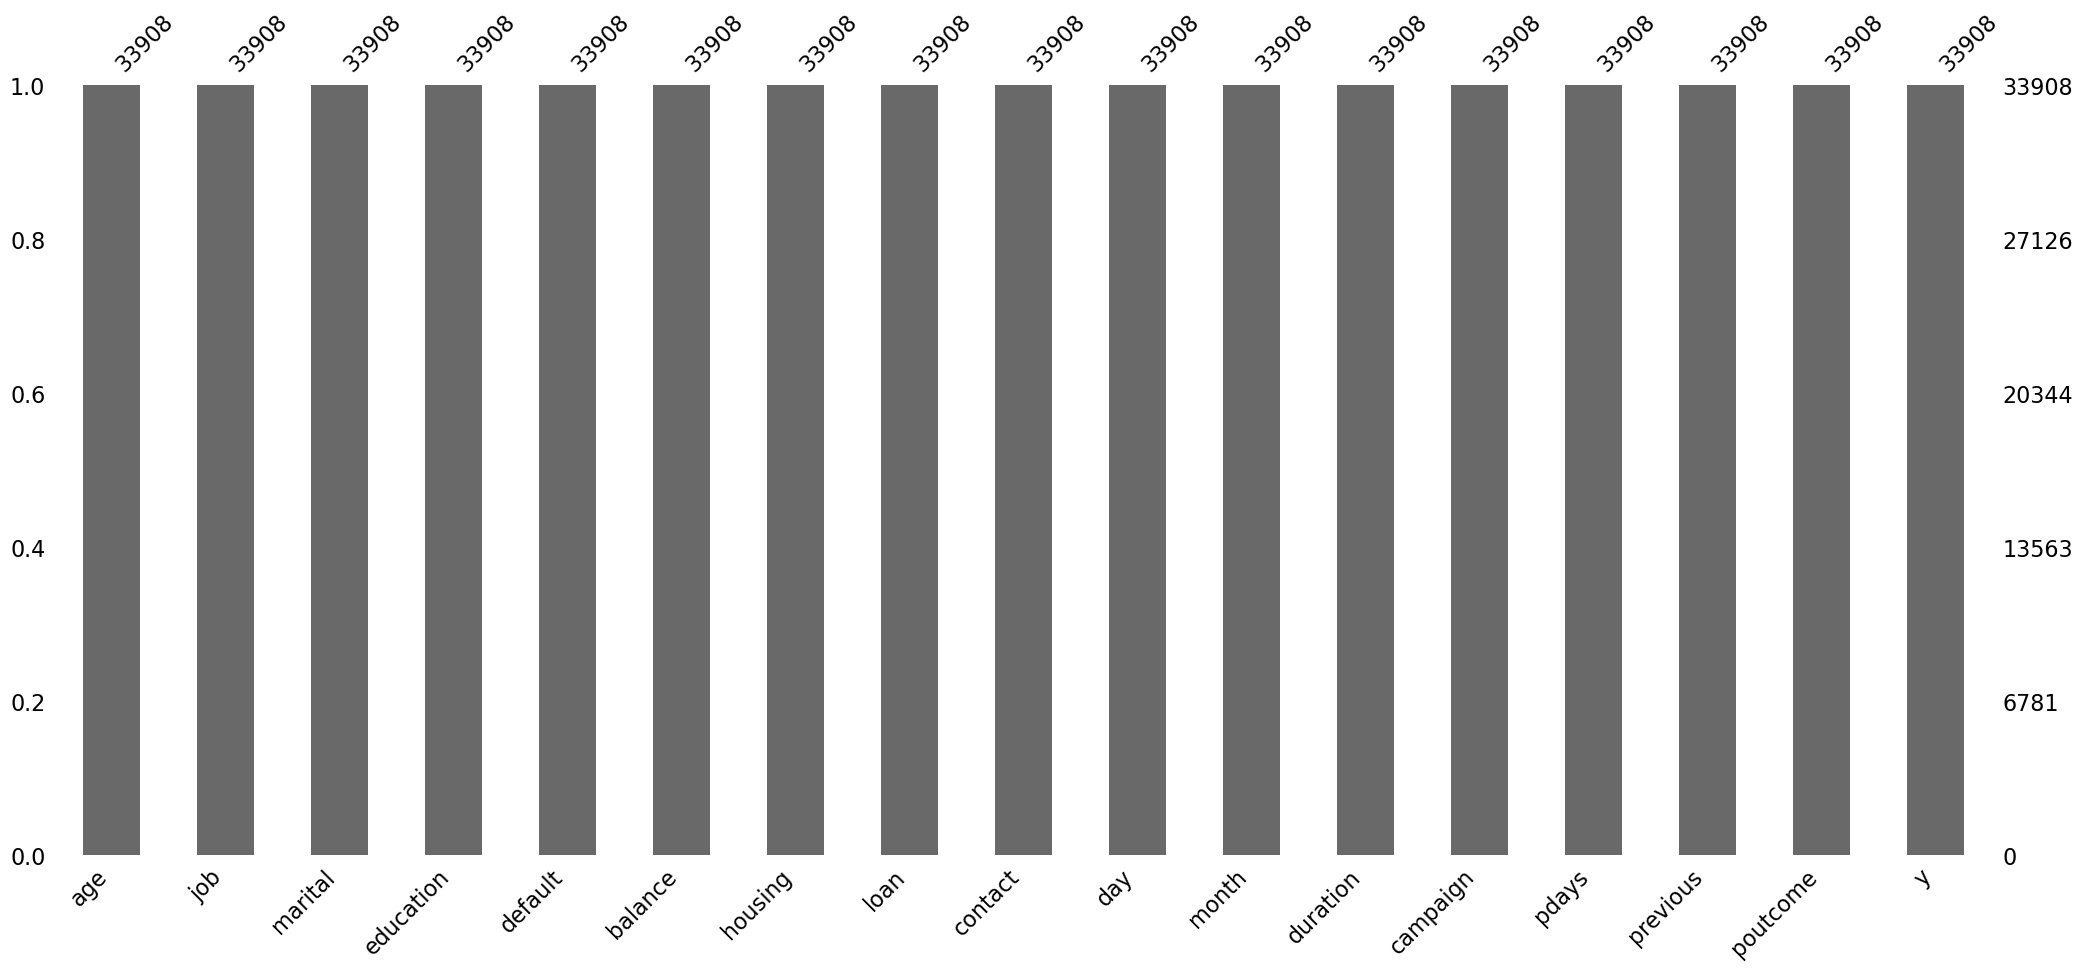

In [20]:
msn.bar(data)

### SPLIT THE NUMERICAL AND CATEGORICAL COLUMNS

In [21]:
num = data.select_dtypes(exclude = 'object')
cat = data.select_dtypes(include= 'object')

In [22]:
num 

,age,balance,day,duration,campaign,pdays,previous
0,58,166,3,211,1,-1,0
1,51,2995,11,93,2,-1,0
2,50,569,18,452,4,-1,0
3,27,73,5,140,1,-1,0
4,38,6447,12,296,1,-1,0
...,...,...,...,...,...,...,...
33903,32,471,2,243,3,-1,0
33904,44,0,20,141,3,-1,0
33905,42,0,6,293,1,-1,0
33906,34,116,11,145,2,-1,0


In [23]:
cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,retired,married,secondary,no,no,yes,unknown,jul,unknown,no
1,blue-collar,married,primary,no,yes,no,unknown,jun,unknown,no
2,management,married,tertiary,no,no,yes,cellular,aug,unknown,no
3,admin.,married,secondary,no,yes,no,cellular,feb,unknown,no
4,self-employed,divorced,tertiary,no,no,no,cellular,jan,unknown,no
...,...,...,...,...,...,...,...,...,...,...
33903,admin.,single,secondary,no,no,yes,cellular,apr,unknown,yes
33904,management,married,tertiary,no,yes,no,cellular,aug,unknown,no
33905,technician,single,secondary,no,yes,no,unknown,may,unknown,no
33906,technician,married,tertiary,no,no,no,cellular,aug,unknown,no


### Describing the data

In [24]:
cm = sns.color_palette("magma", as_cmap=True)
data.describe().style.background_gradient(cmap = cm,axis = None)

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,40.966763,1370.713136,15.803763,257.899227,2.752920,40.168515,0.581987
std,10.613701,3111.689069,8.314558,258.607105,3.068299,99.892114,2.412482
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1430.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Correlation 

<AxesSubplot:>

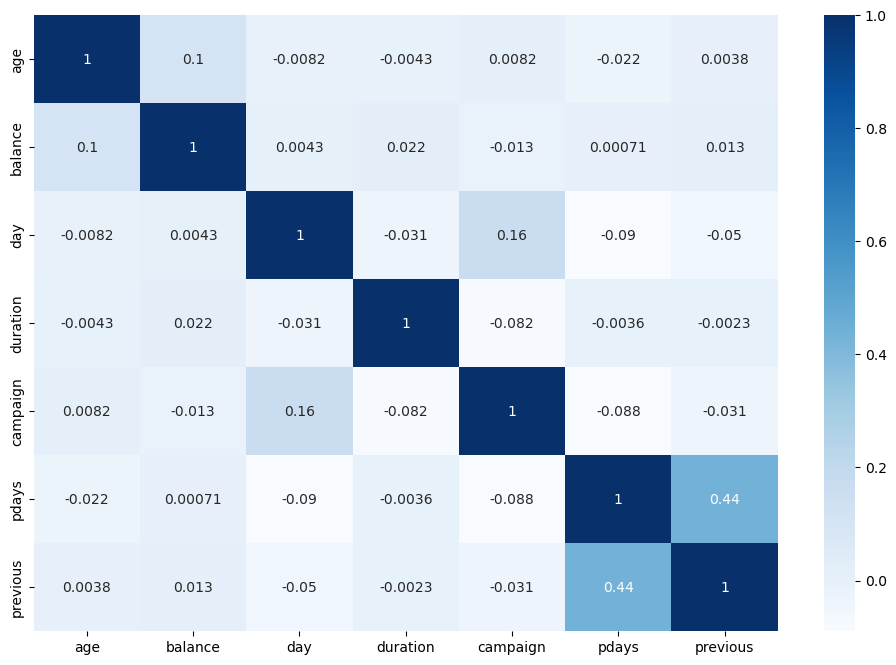

In [25]:
correlated_data = data.corr()
plt.figure(figsize= (12,8))
sns.heatmap(correlated_data, cmap="Blues", annot=True)

### Data Visualization

#### First, let's try to undertand age distribution of customers.

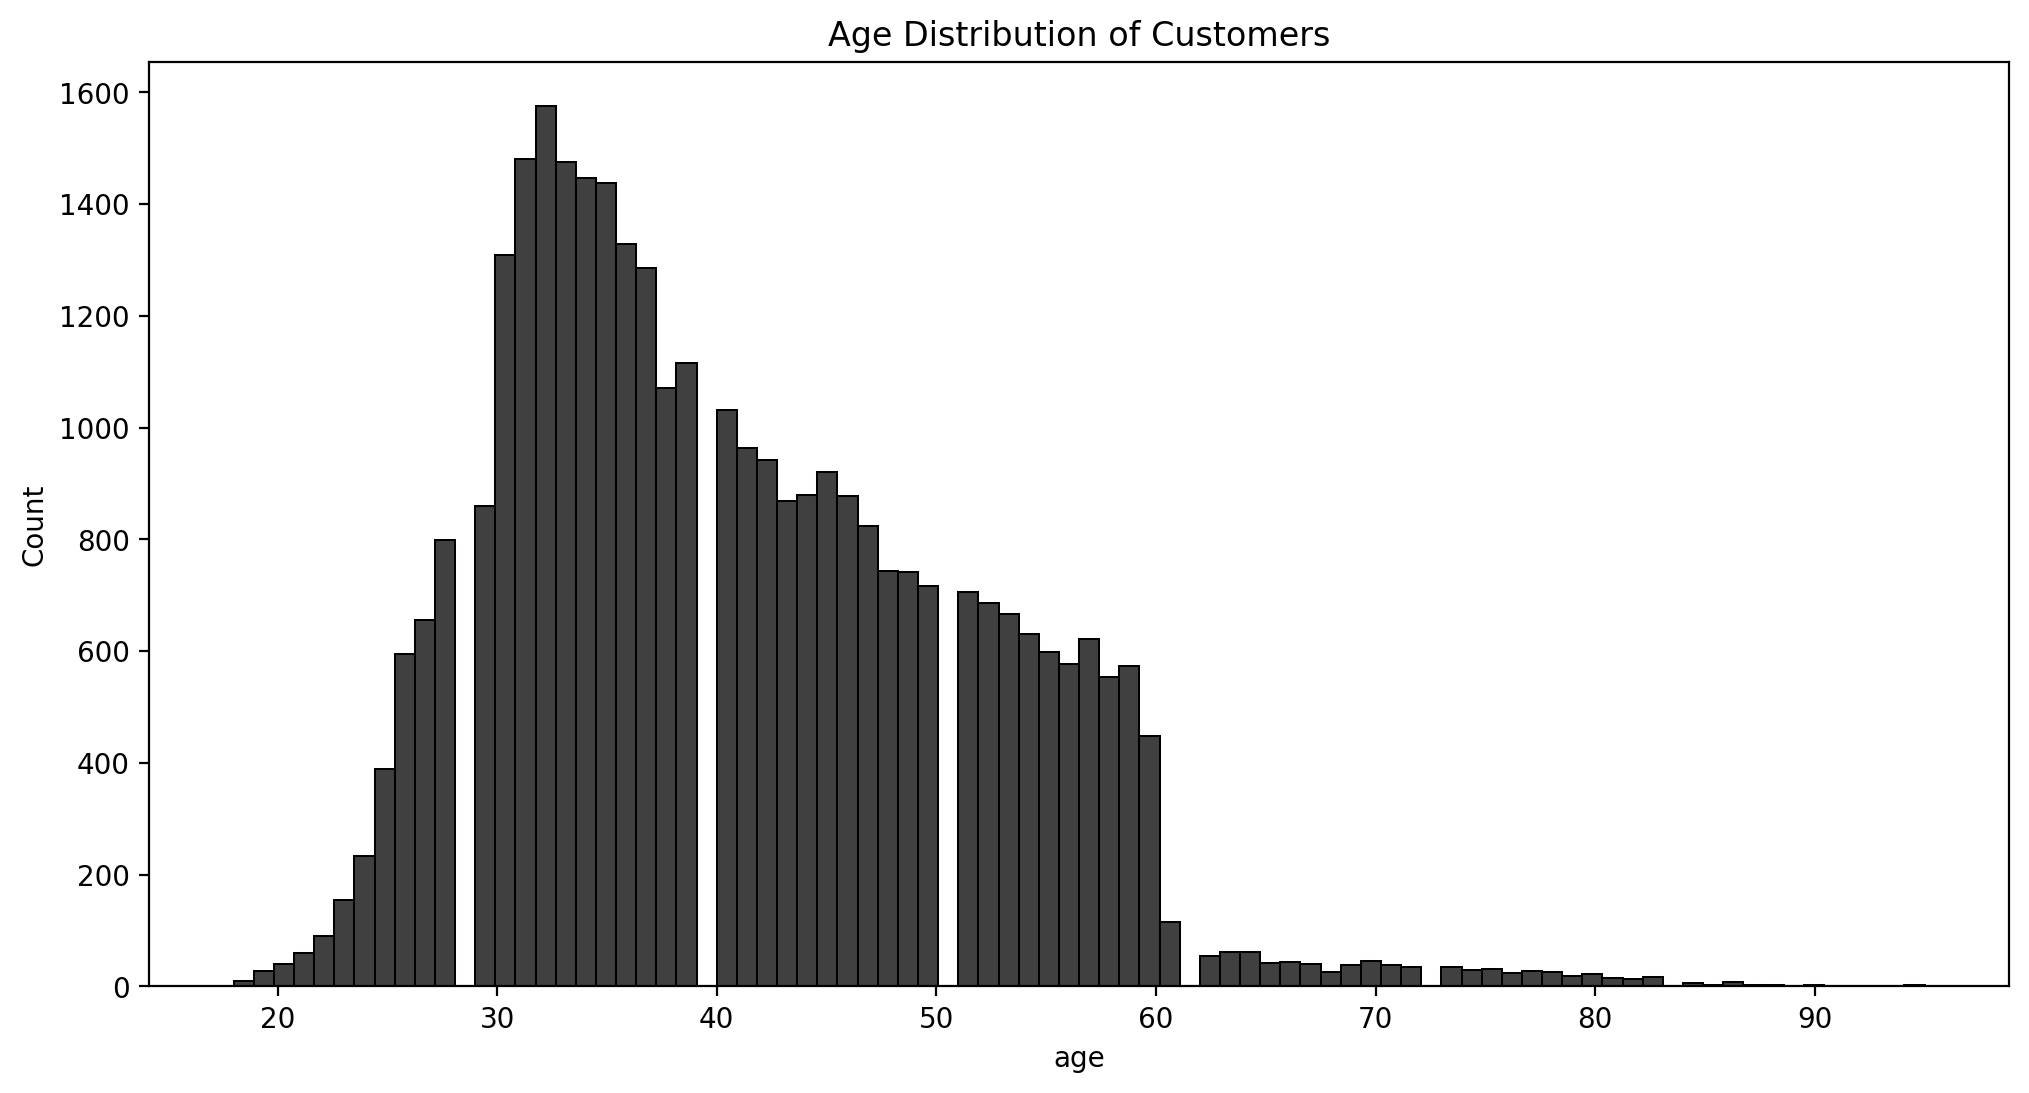

In [26]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=data,x="age",color="black")
plt.title("Age Distribution of Customers")
plt.show()

#### Now we will try to undertand marital status distribution of customers.

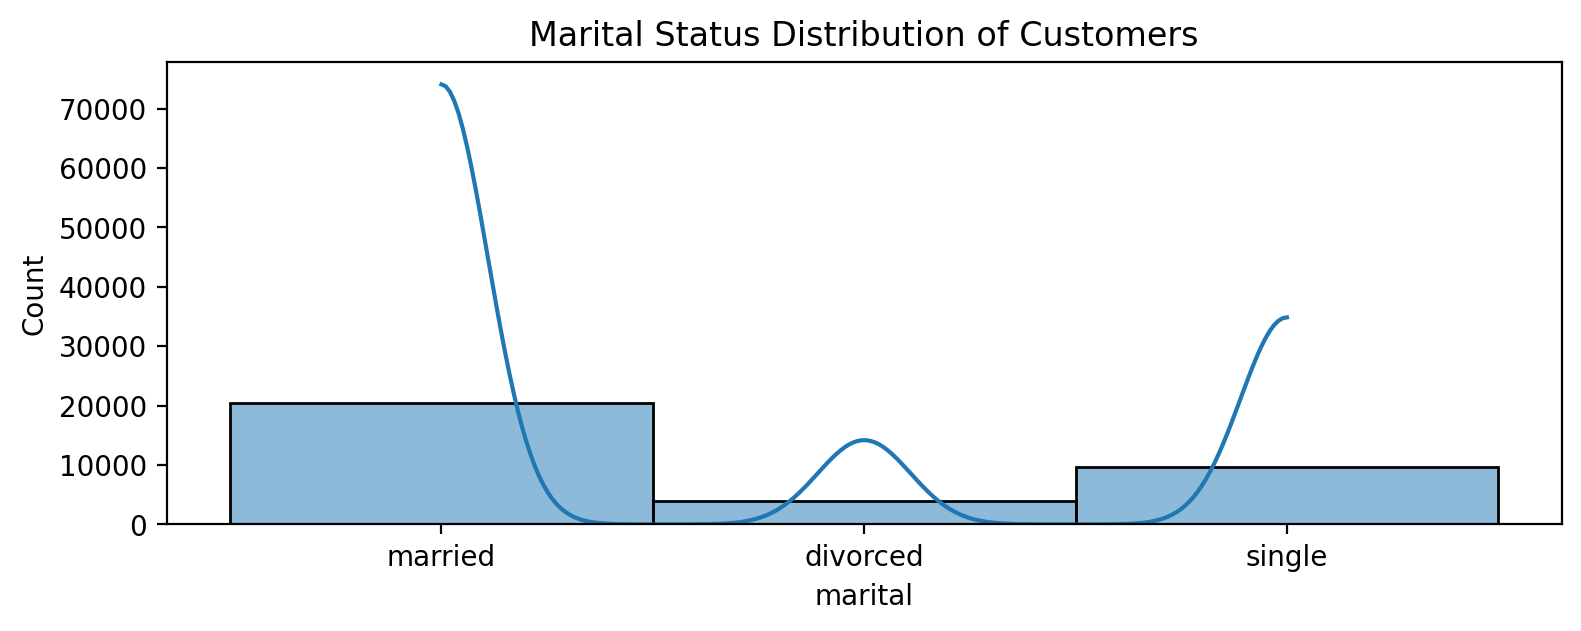

In [27]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=data,x="marital",kde=True)
plt.title("Marital Status Distribution of Customers")
plt.show()

#### pdays column means number of days that passed by after the client was last contacted from a previous campaign.

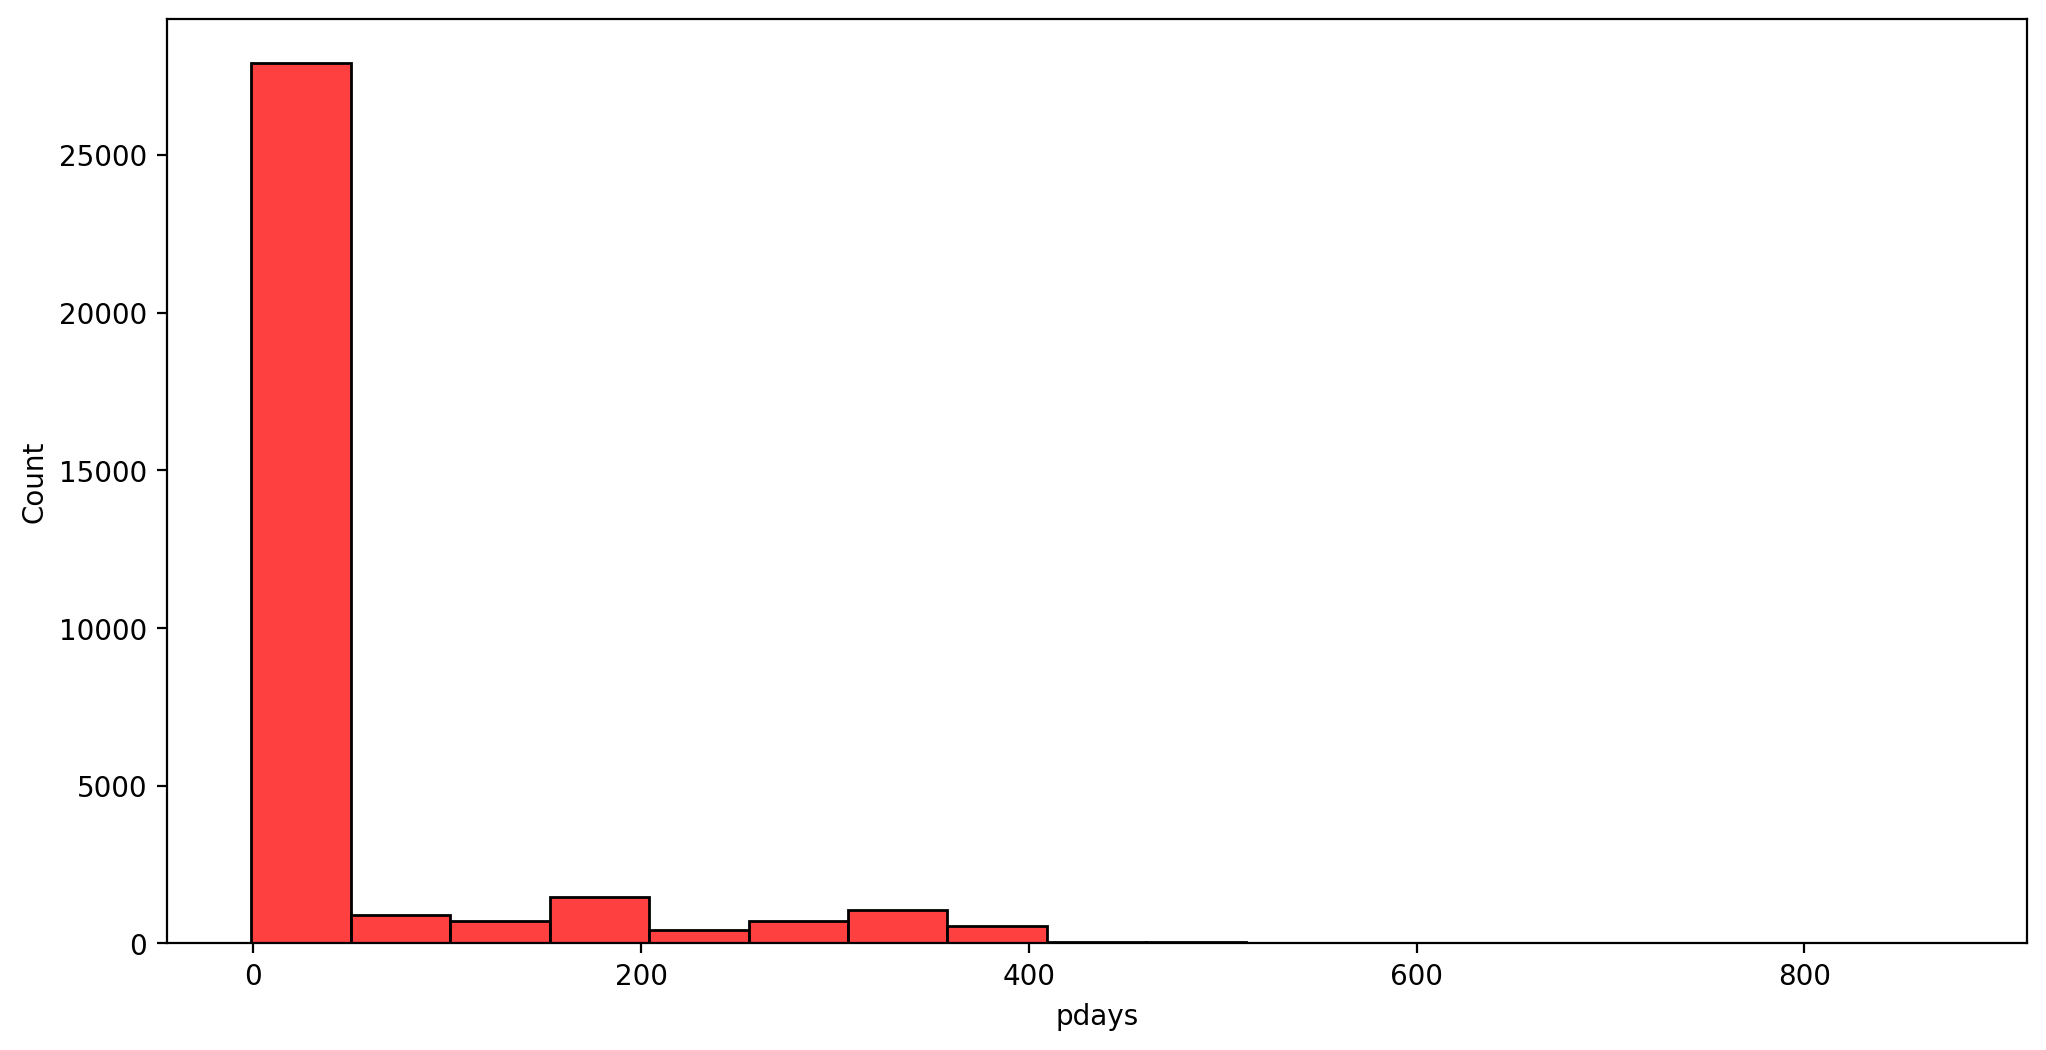

In [28]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=data,x="pdays",color="red")
plt.show()

#### As we can see, there are many clients that was not previously contacted. Now we will look only contacted clients.

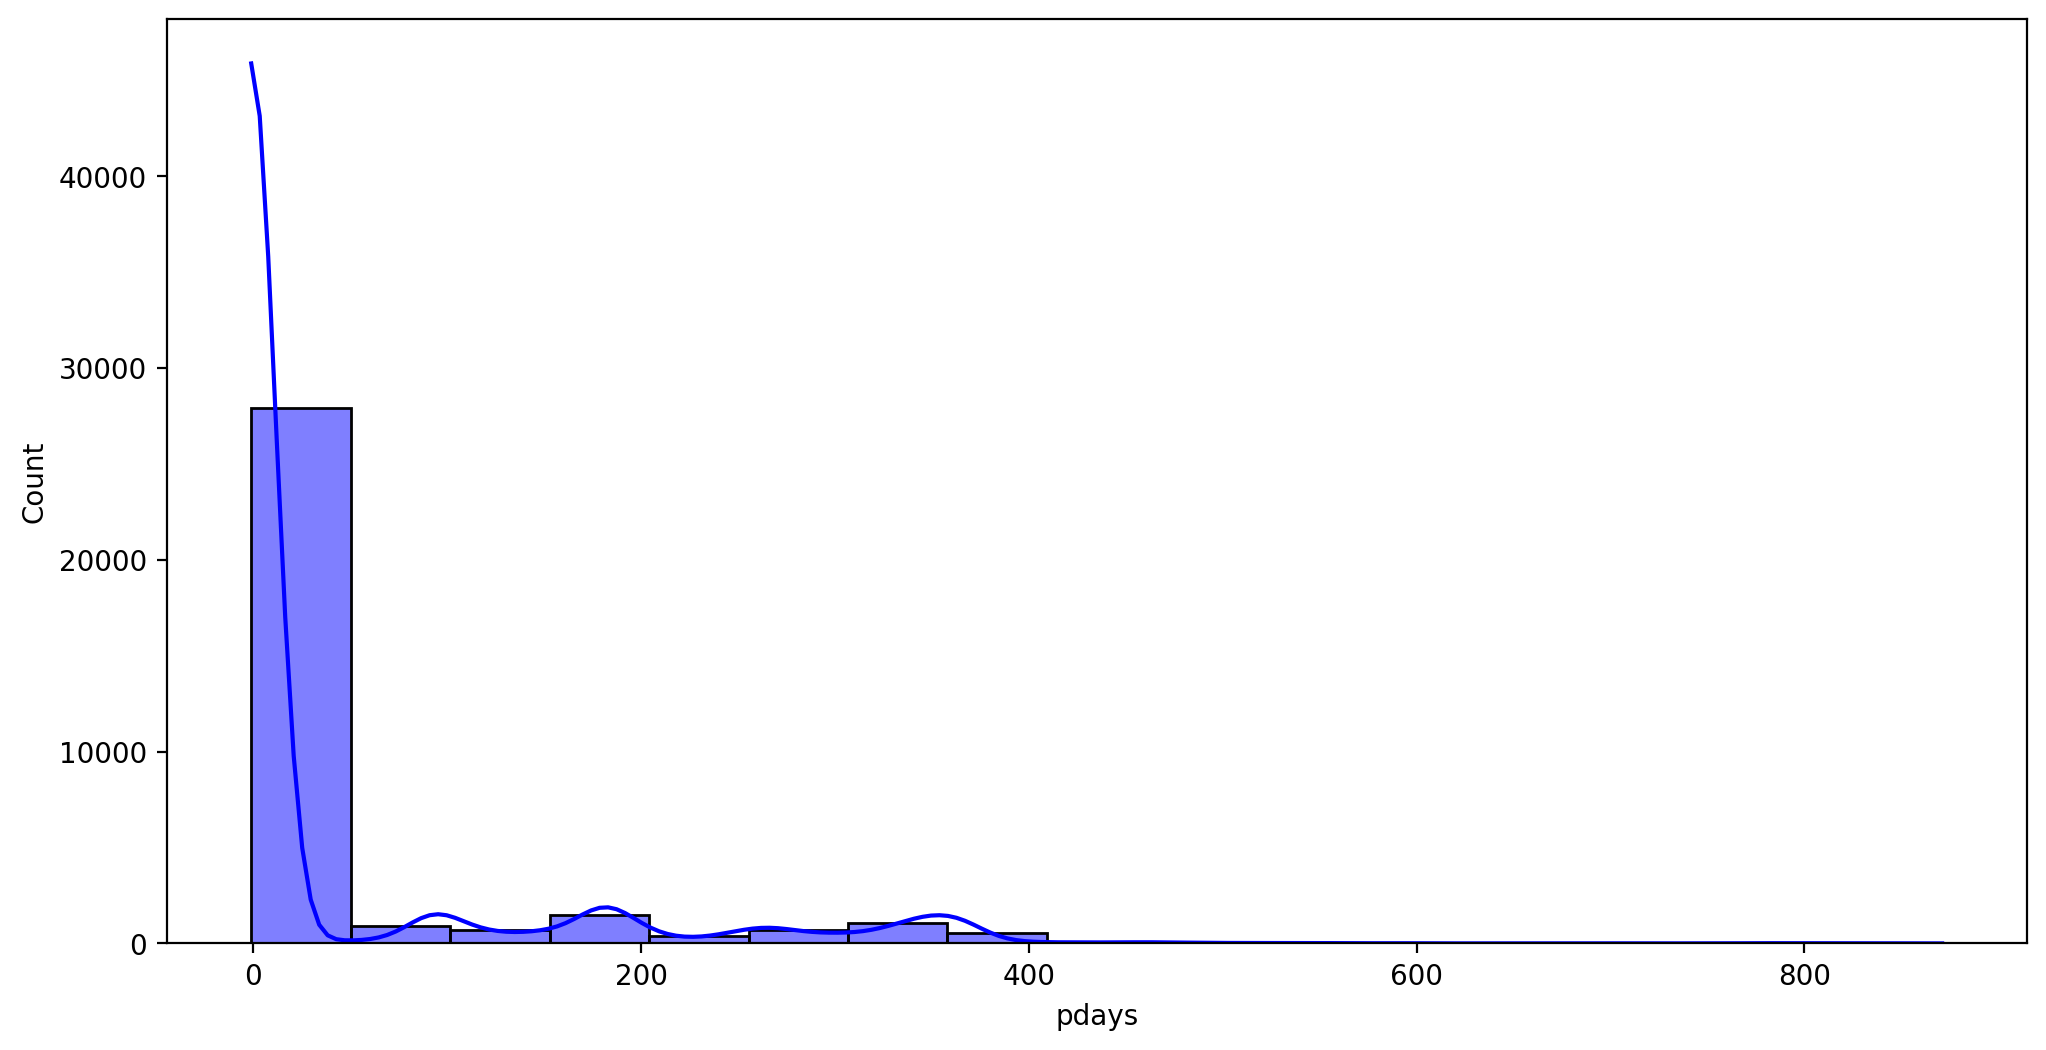

In [29]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=data[data.pdays!=999],x="pdays",color="blue",kde=True)
plt.show()

#### We also want to see if there is between ages and loan status of customers.

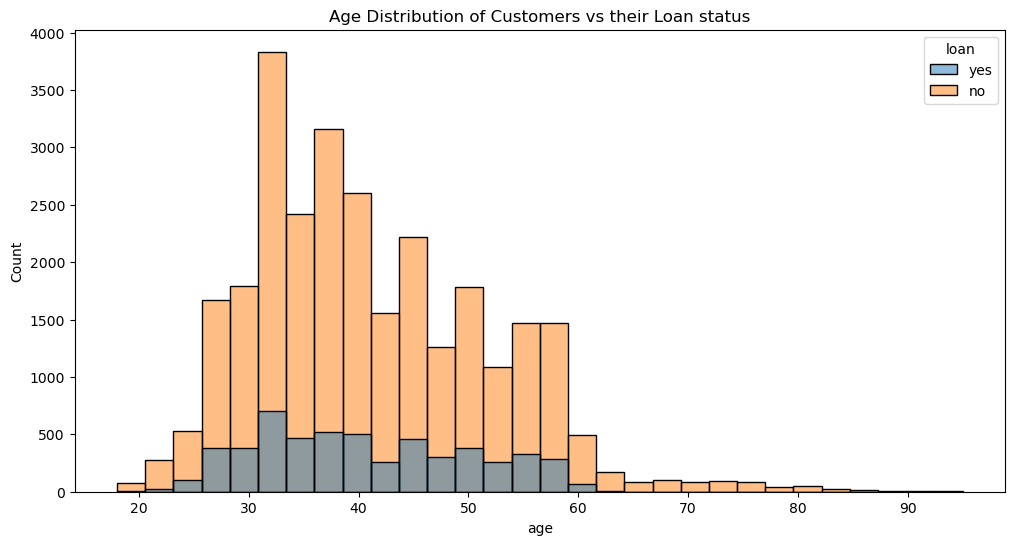

In [30]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=data,x="age",hue="loan",bins=30)
plt.title("Age Distribution of Customers vs their Loan status")
plt.show()

#### Now we will look distribution of durations based on contact type.

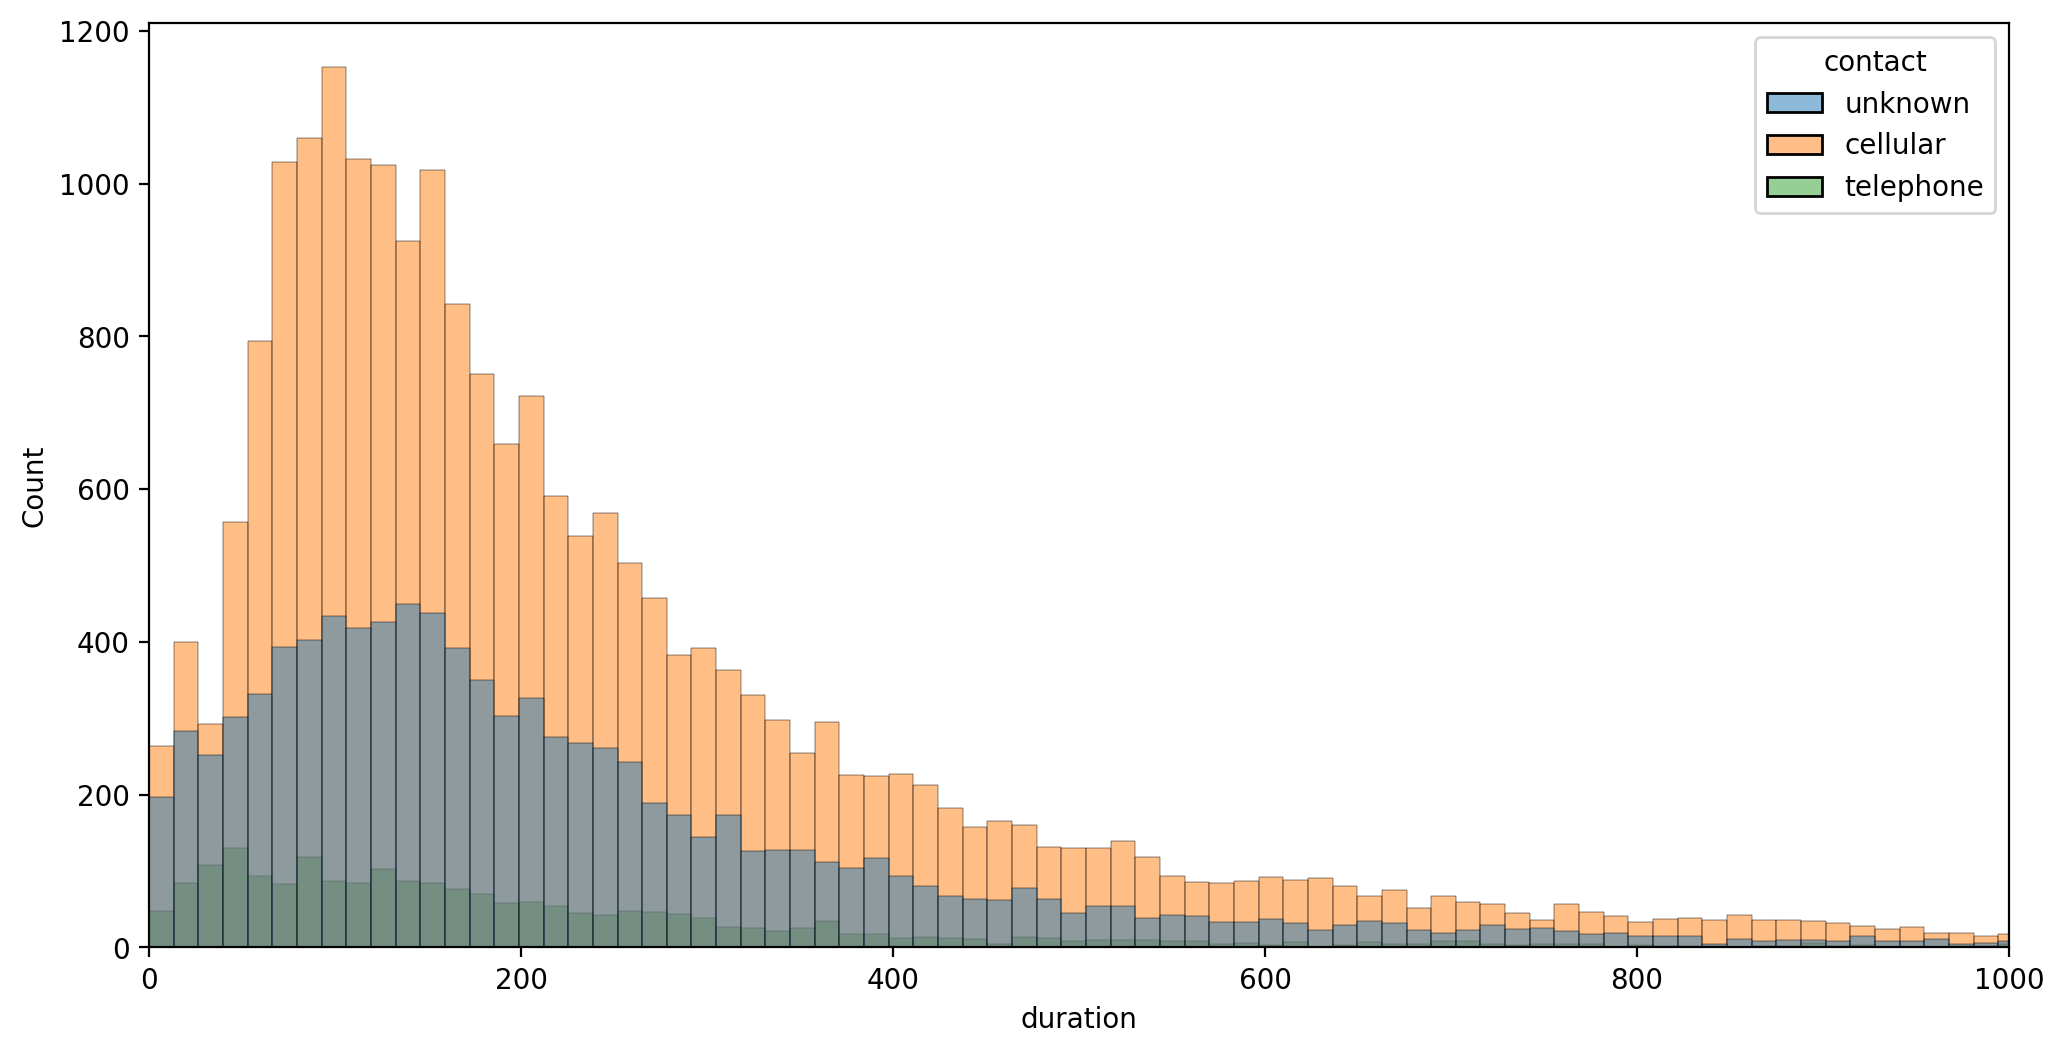

In [31]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=data,x="duration",hue="contact",color="purple")
plt.xlim(0,1000)
plt.show()

In [ ]:
def countsplot(x):
    for feature in cat.columns:
        sns.countplot(data[feature],palette = "Set2")
        plt.show()

In [ ]:
countsplot(data)

In [34]:
col = data.columns

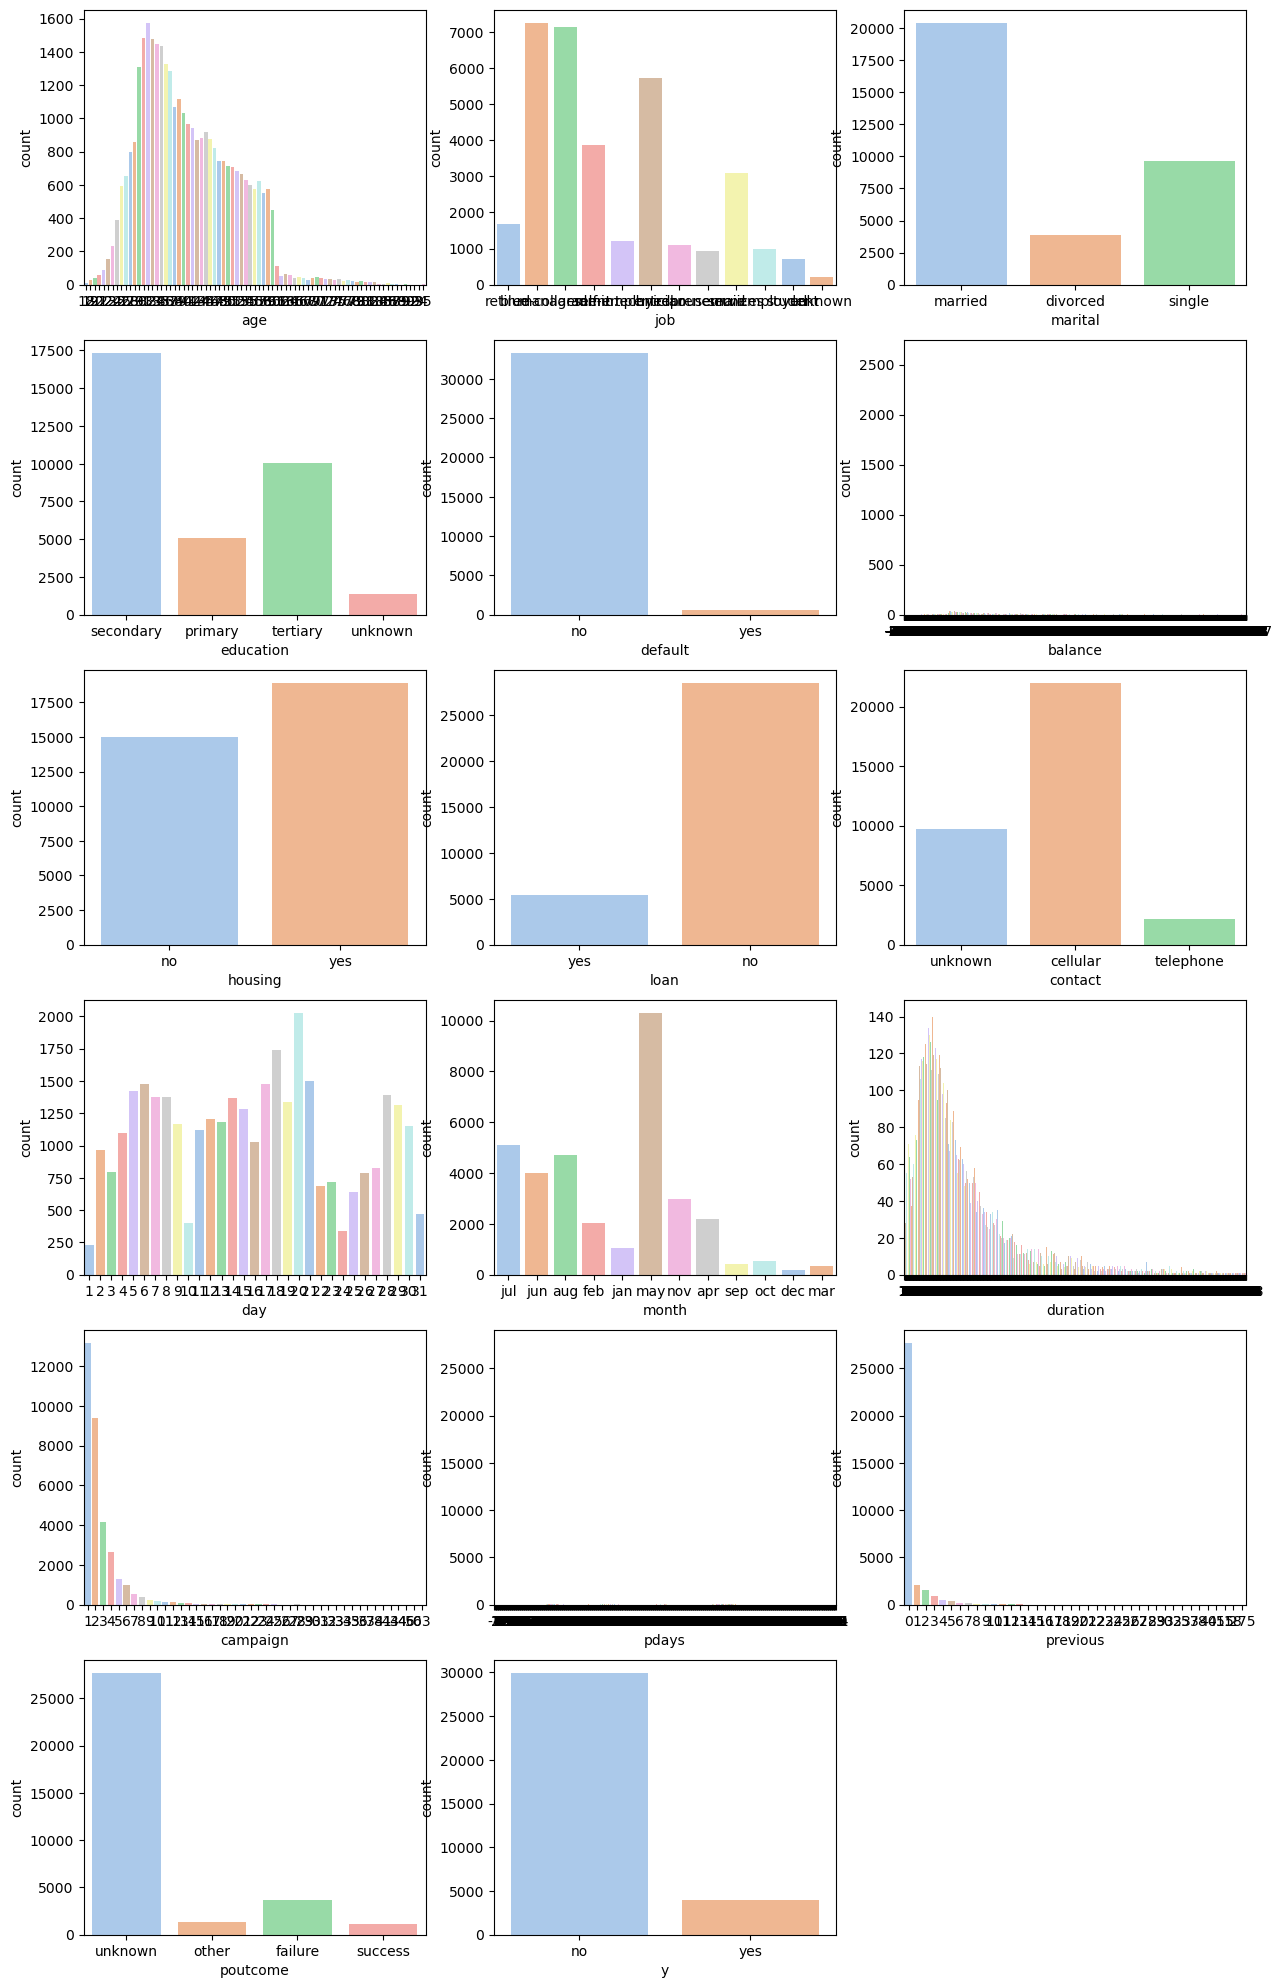

In [36]:
i = 1
plt.figure(figsize = (15,25))
for feature in col:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data ,palette="pastel")
    i +=1

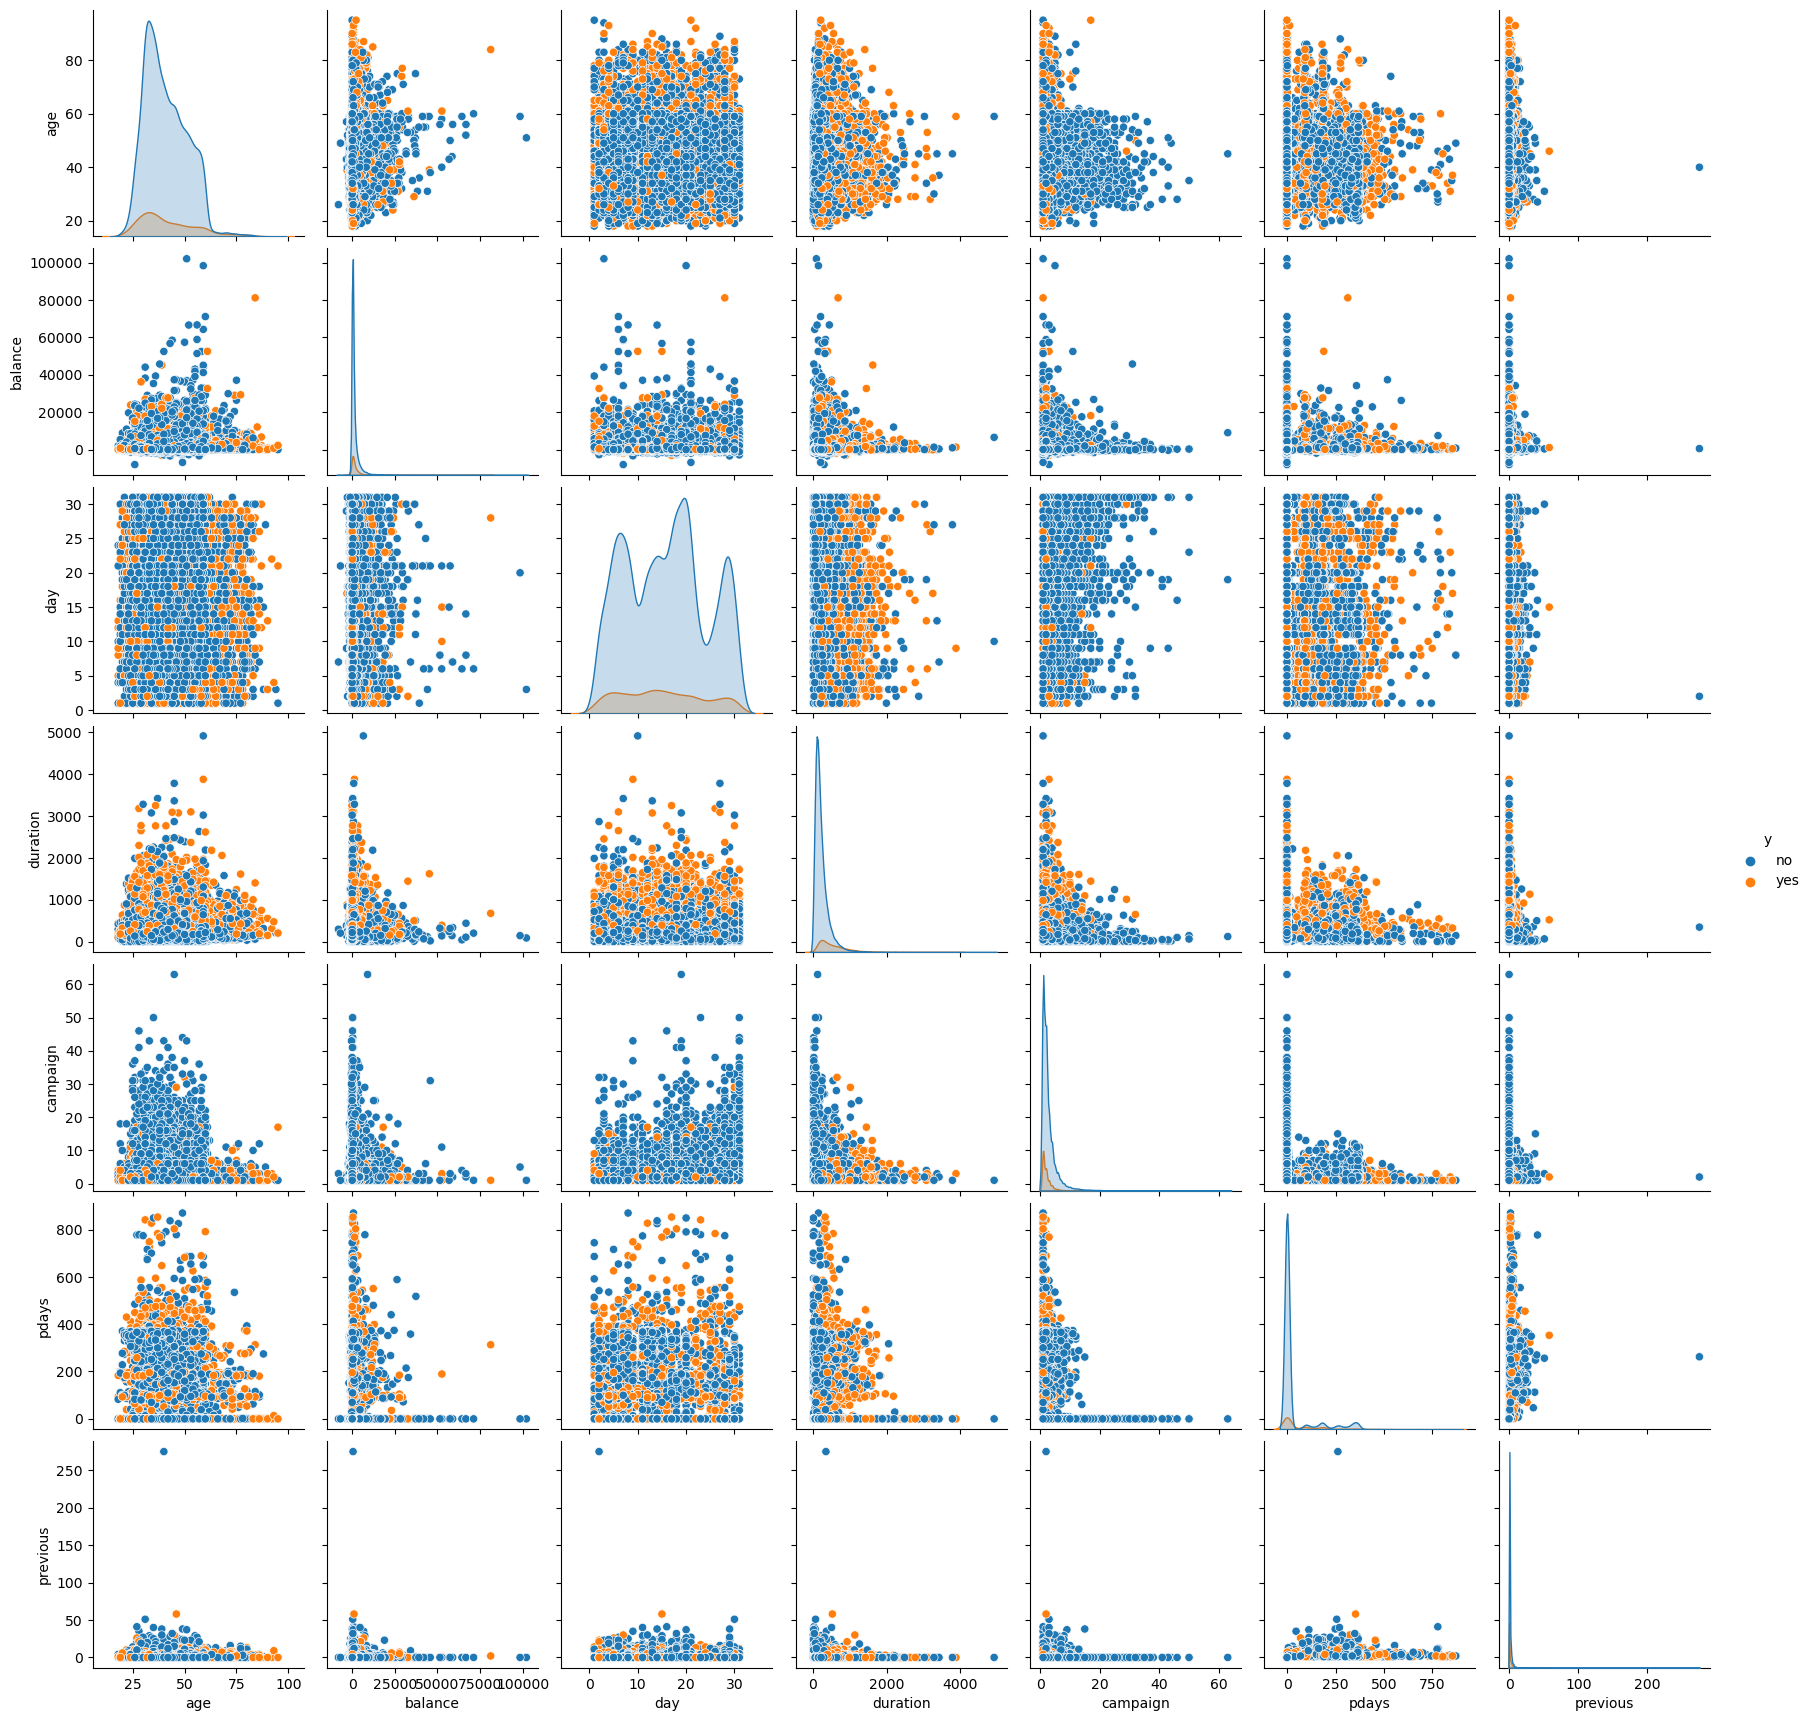

In [37]:
sns.pairplot(data, hue="y")

In [39]:
cat = data.dtypes[data.dtypes == 'object'].index

In [40]:
def piechart(x):
    for i in cat:
        fig=px.pie(data,values=data[i].value_counts(),
               names=data[i].value_counts().index,template ="simple_white",
               color_discrete_sequence = px.colors.diverging.Tropic)
        fig.update_layout(title_text="Distribution Of The "+i,
                      title_x=0.5,
                      font_size=15)
        fig.show()

In [41]:
piechart(data)

### Splitting the data into target and Features

In [42]:
 x = data.iloc[:,:-1]

In [43]:
y = data.iloc[:,-1]

### Using SMOTE because data is imbalanced

In [44]:
data.iloc[:,-1].value_counts()

no     29941
yes     3967
Name: y, dtype: int64

In [45]:
feature_analysis('y')

unique_values: 
 ['no' 'yes'] 
 value_counts: 
 no     29941
yes     3967
Name: y, dtype: int64 
 proportion of value: 
 no     88.300696
yes    11.699304
Name: y, dtype: float64 
 count of nan values: 0


In [46]:
from imblearn.over_sampling import SMOTE

### Train_Test split

In [47]:
from sklearn.model_selection import train_test_split 

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [49]:
x_train.shape,y_train.shape

((23735, 16), (23735,))

### Features Encoding

In [50]:
X_train = pd.get_dummies(x_train, drop_first = True)

In [51]:
X_test = pd.get_dummies(x_test, drop_first = True)

In [52]:
Y_train = pd.get_dummies(y_train, drop_first = True)

In [53]:
Y_test = pd.get_dummies(y_test,drop_first = True)

### Implementing SMOTE

In [54]:
X_train,Y_train = SMOTE().fit_resample(X_train,Y_train)

In [55]:
X_train.shape , Y_train.shape

((41916, 42), (41916, 1))

## Model Building

## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

In [57]:
logitmodel = LogisticRegression()
logitmodel.fit(X_train,Y_train)

LogisticRegression()

In [58]:
logitmodel.score(X_train,Y_train)

0.8872745490981964

In [59]:
log_pred = logitmodel.predict(X_test)

In [60]:
print(classification_report(Y_test,log_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      8983
           1       0.43      0.61      0.50      1190

    accuracy                           0.86     10173
   macro avg       0.69      0.75      0.71     10173
weighted avg       0.88      0.86      0.87     10173



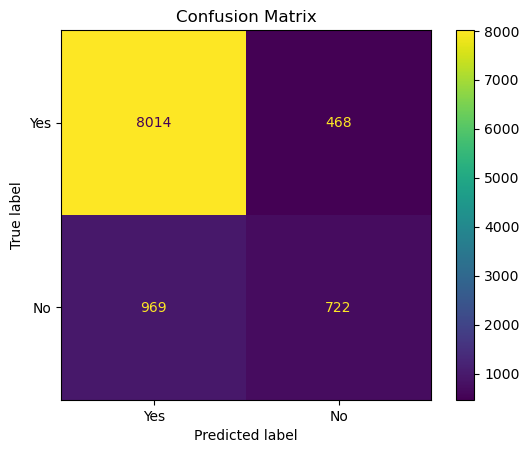

In [61]:
conf_matrix = confusion_matrix(log_pred,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [62]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [63]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [64]:
dt_model.score(X_train ,Y_train)

1.0

In [65]:
pred = dt_model.predict(X_test)

In [66]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8983
           1       0.41      0.49      0.45      1190

    accuracy                           0.86     10173
   macro avg       0.67      0.70      0.68     10173
weighted avg       0.87      0.86      0.86     10173



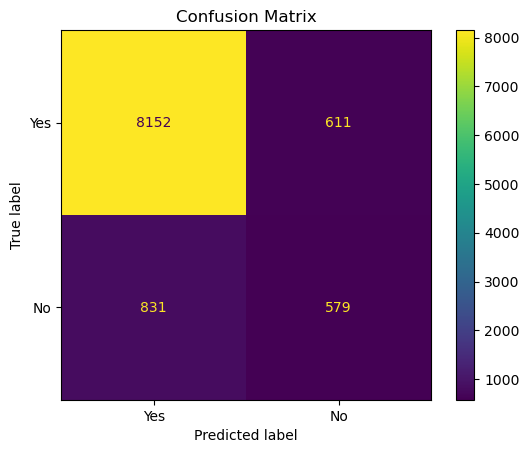

In [67]:
conf_matrix = confusion_matrix(pred,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [70]:
rf_model.score(X_train,Y_train)

1.0

In [71]:
pred1 = rf_model.predict(X_test)
print(classification_report(Y_test,pred1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8983
           1       0.57      0.49      0.53      1190

    accuracy                           0.90     10173
   macro avg       0.75      0.72      0.74     10173
weighted avg       0.89      0.90      0.89     10173



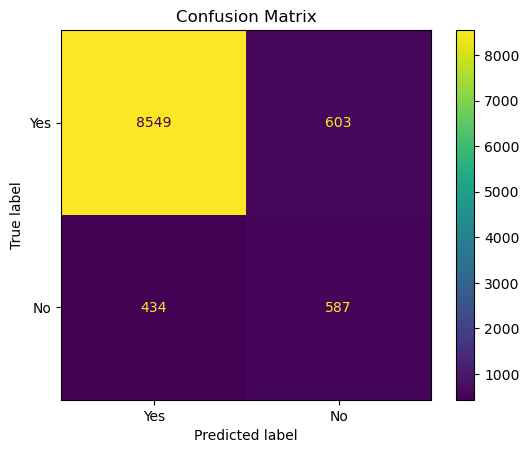

In [72]:
conf_matrix = confusion_matrix(pred1,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### Extra Tree 

In [73]:
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
model3 = ExtraTreesClassifier()
model3 = model3.fit(X_train,Y_train)

In [76]:
model3.score(X_train,Y_train)

1.0

In [77]:
pred2 = model3.predict(X_test)
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      8983
           1       0.55      0.38      0.45      1190

    accuracy                           0.89     10173
   macro avg       0.74      0.67      0.70     10173
weighted avg       0.88      0.89      0.88     10173



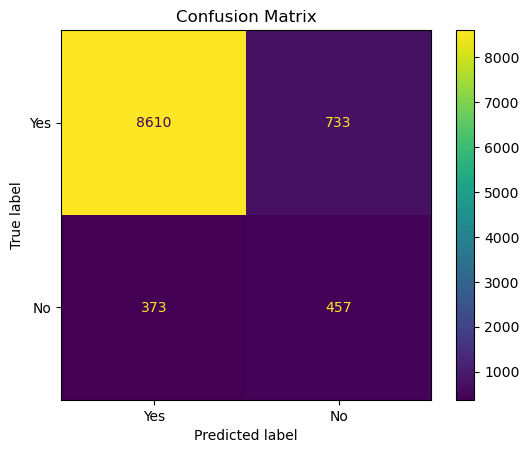

In [78]:
conf_matrix = confusion_matrix(pred2,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### Ada Boost 

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
model4 = AdaBoostClassifier()
model4= model4.fit(X_train,Y_train)

In [81]:
model4.score(X_train,Y_train)

0.925469987594236

In [82]:
pred3 = model4.predict(X_test)
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8983
           1       0.47      0.53      0.50      1190

    accuracy                           0.88     10173
   macro avg       0.70      0.72      0.71     10173
weighted avg       0.88      0.88      0.88     10173



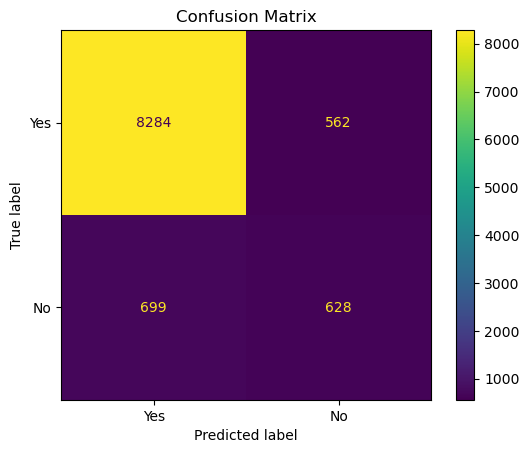

In [83]:
conf_matrix = confusion_matrix(pred3,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### XGBoost

In [84]:
from xgboost import XGBClassifier

In [85]:
xgb_model = XGBClassifier()
xgb = xgb_model.fit(X_train,Y_train)

In [86]:
xgb.score(X_train,Y_train)

0.9755701879950377

In [87]:
pred4 = xgb_model.predict(X_test)
print(classification_report(Y_test,pred4))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8983
           1       0.56      0.55      0.55      1190

    accuracy                           0.90     10173
   macro avg       0.75      0.75      0.75     10173
weighted avg       0.90      0.90      0.90     10173



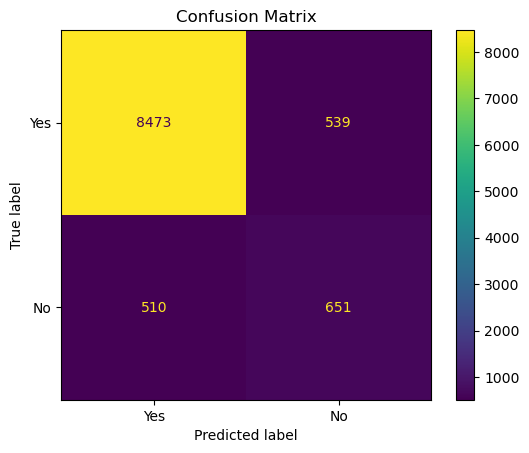

In [88]:
conf_matrix = confusion_matrix(pred4,Y_test)
cf = ConfusionMatrixDisplay(conf_matrix, display_labels=["Yes","No"])
cf.plot()
plt.title("Confusion Matrix")
plt.show()

### F1_score

In [89]:
from sklearn.metrics import f1_score

In [92]:
pd.DataFrame(data = [f1_score(Y_test,log_pred, average='weighted'),
f1_score(Y_test,pred, average='weighted'),
f1_score(Y_test,pred1, average='weighted'),
f1_score(Y_test,pred2, average='weighted'),
f1_score(Y_test,pred3, average='weighted'),
f1_score(Y_test,pred4, average='weighted')],index=['Logistic','DT','RF','ETC','ADA','XGB'],
            columns=['F1 Score']).sort_values(by='F1 Score',ascending=False)

,F1 Score
XGB,0.896331
RF,0.894643
ETC,0.882661
ADA,0.878942
Logistic,0.869000
DT,0.863371


### PIPELINE

In [93]:
from sklearn.preprocessing import OneHotEncoder

In [94]:
from sklearn.pipeline import Pipeline

In [95]:
pipe = Pipeline([('OneHotEncoder', OneHotEncoder(handle_unknown = 'ignore')),('XGB',XGBClassifier())])

In [97]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('OneHotEncoder', OneHotEncoder(handle_unknown='ignore')),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=N

In [98]:
pipe.score(X_train,Y_train)

0.9335098768966504

In [99]:
x_val = pd.read_csv("test.csv")

In [100]:
pipe.feature_names_in_

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [101]:
y_pred_val = pd.DataFrame(pipe.predict(pd.get_dummies(x_val, drop_first = True)))

In [102]:
y_pred_val.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Converting it in csv

In [103]:
y_pred_val['pred'] = ['no' if x == 0 else 'yes' for x in y_pred_val.values]

In [104]:
y_pred_val['pred'].to_csv('y_pred_val.csv')